In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import my_toolbox as tb

main_path = "C:/Users/Ben/My Drive/PhD/PhD Year 3/3rd Year Paper/Model/My Code/MH_Model/my_code/model_uncert/"
input_path = main_path + "input/50p_age_moms/"

MP_df = pd.read_csv(input_path + "MP_health_age.csv")
print(MP_df.head())

age_grid = MP_df["age"].to_numpy()
mh_data = MP_df["mean_mental_health"].to_numpy()
mh_sem_data = MP_df["sem_mental_health"].to_numpy()
ph_data = MP_df["mean_physical_health"].to_numpy()
ph_sem_data = MP_df["sem_physical_health"].to_numpy()


   age  mean_mental_health  sd_mental_health  sem_mental_health  \
0   25           46.575623         10.377148           0.273747   
1   26           46.573097         10.335335           0.272644   
2   27           46.794851         10.848629           0.282570   
3   28           47.007497         10.317415           0.260720   
4   29           47.090785         10.602632           0.258524   

   mean_physical_health  sd_physical_health  sem_physical_health  
0             54.076681            7.583962             0.200063  
1             54.221239            7.629538             0.201266  
2             53.829098            7.961336             0.207366  
3             53.754674            8.034341             0.203027  
4             53.852402            7.731483             0.188517  


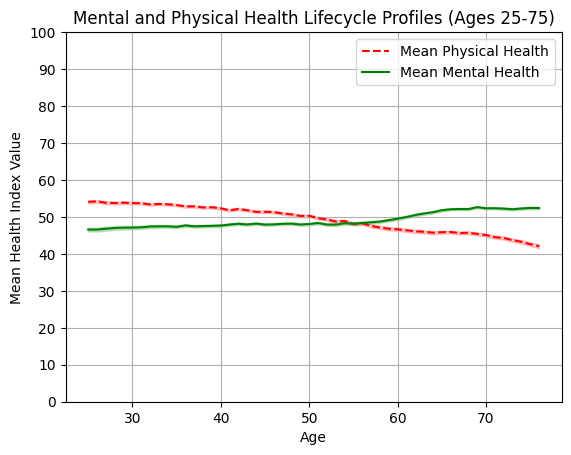

In [10]:
ages = age_grid
mean_profile1 = mh_data
mean_profile2 = ph_data
se_profile1 = mh_sem_data
se_profile2 = ph_sem_data
p1_name = 'Mean Mental Health'
p2_name = 'Mean Physical Health'
quietly = False
save_path = main_path + "output/"


# Calculate confidence intervals
ci_upper1 = mean_profile1 + 1.96 * se_profile1
ci_lower1 = mean_profile1 - 1.96 * se_profile1
ci_upper2 = mean_profile2 + 1.96 * se_profile2
ci_lower2 = mean_profile2 - 1.96 * se_profile2

y_lim = [0, 100]

# Plotting

# Plot lifecycle profile 2 with its confidence interval
plt.plot(ages, mean_profile2, label=p2_name, color='red', linestyle='--')
plt.fill_between(ages, ci_lower2, ci_upper2, color='red', alpha=0.2)

# Plot lifecycle profile 1 with its confidence interval
plt.plot(ages, mean_profile1, label= p1_name, color='green')
plt.fill_between(ages, ci_lower1, ci_upper1, color='green', alpha=0.2)


# Add labels and title
plt.xlabel('Age')
plt.ylabel('Mean Health Index Value')
plt.title('Mental and Physical Health Lifecycle Profiles (Ages 25-75)')
plt.legend(loc='best')

# Set the y-axis limits
plt.ylim(y_lim)
plt.grid(True)
plt.yticks(np.arange(y_lim[0], y_lim[1] + 1, 10))


if save_path is not None:
    plt.savefig(save_path + "fig_MP_health_age.pdf", bbox_inches='tight')
if not quietly:
    plt.show()
plt.close()